# Exploratory Data Analysis (2014 - Present)
In this EDA we'll look at all the data we have from 2014 onwards. This will include:

1. Talent Level of teams through recruiting, returning players, returning usage, etc.
2. Previous success information, including team ELO ratings, team win percentages, coach win percentages, etc.

**Note:** For predicting results in year n, we need talent info for year n and performance info from year n-1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load working dataframe from data prep
df = pd.read_csv('data/working_df.csv')
df.head()

,team,year,conference,expected_wins,win_pct,recent_win_pct,elo,fpi,conference_rating,recruiting_rank,...,off_explode,def_explode,off_ppa,def_ppa,off_success_rate,def_success_rate,coach,career_win_pct,sor,sos
0,Air Force,2014,Mountain West,9.7,0.769231,0.531792,1071.0,-16.682,-5.908333,112,...,0.860561,0.902638,0.096601,0.214295,0.439644,0.518913,Troy Calhoun,0.544444,115.0,113
1,Air Force,2015,Mountain West,8.2,0.571429,0.548387,1432.0,-2.584,-5.466667,123,...,1.089935,1.425767,0.207059,0.138795,0.451837,0.375831,Troy Calhoun,0.572816,48.0,86
2,Air Force,2016,Mountain West,9.4,0.769231,0.550000,1533.0,1.846,-4.766667,114,...,1.154045,1.549206,0.272449,0.172654,0.474216,0.357631,Troy Calhoun,0.572650,71.0,113
3,Air Force,2017,Mountain West,4.4,0.416667,0.563380,1593.0,0.881,-4.683333,109,...,1.027586,1.534094,0.227697,0.158770,0.483333,0.366048,Troy Calhoun,0.592308,49.0,82
4,Air Force,2018,Mountain West,6.4,0.416667,0.555556,1422.0,-6.875,-7.083333,122,...,1.095699,1.374592,0.235542,0.247661,0.488398,0.422096,Troy Calhoun,0.577465,94.0,86


#### Distributions of Features

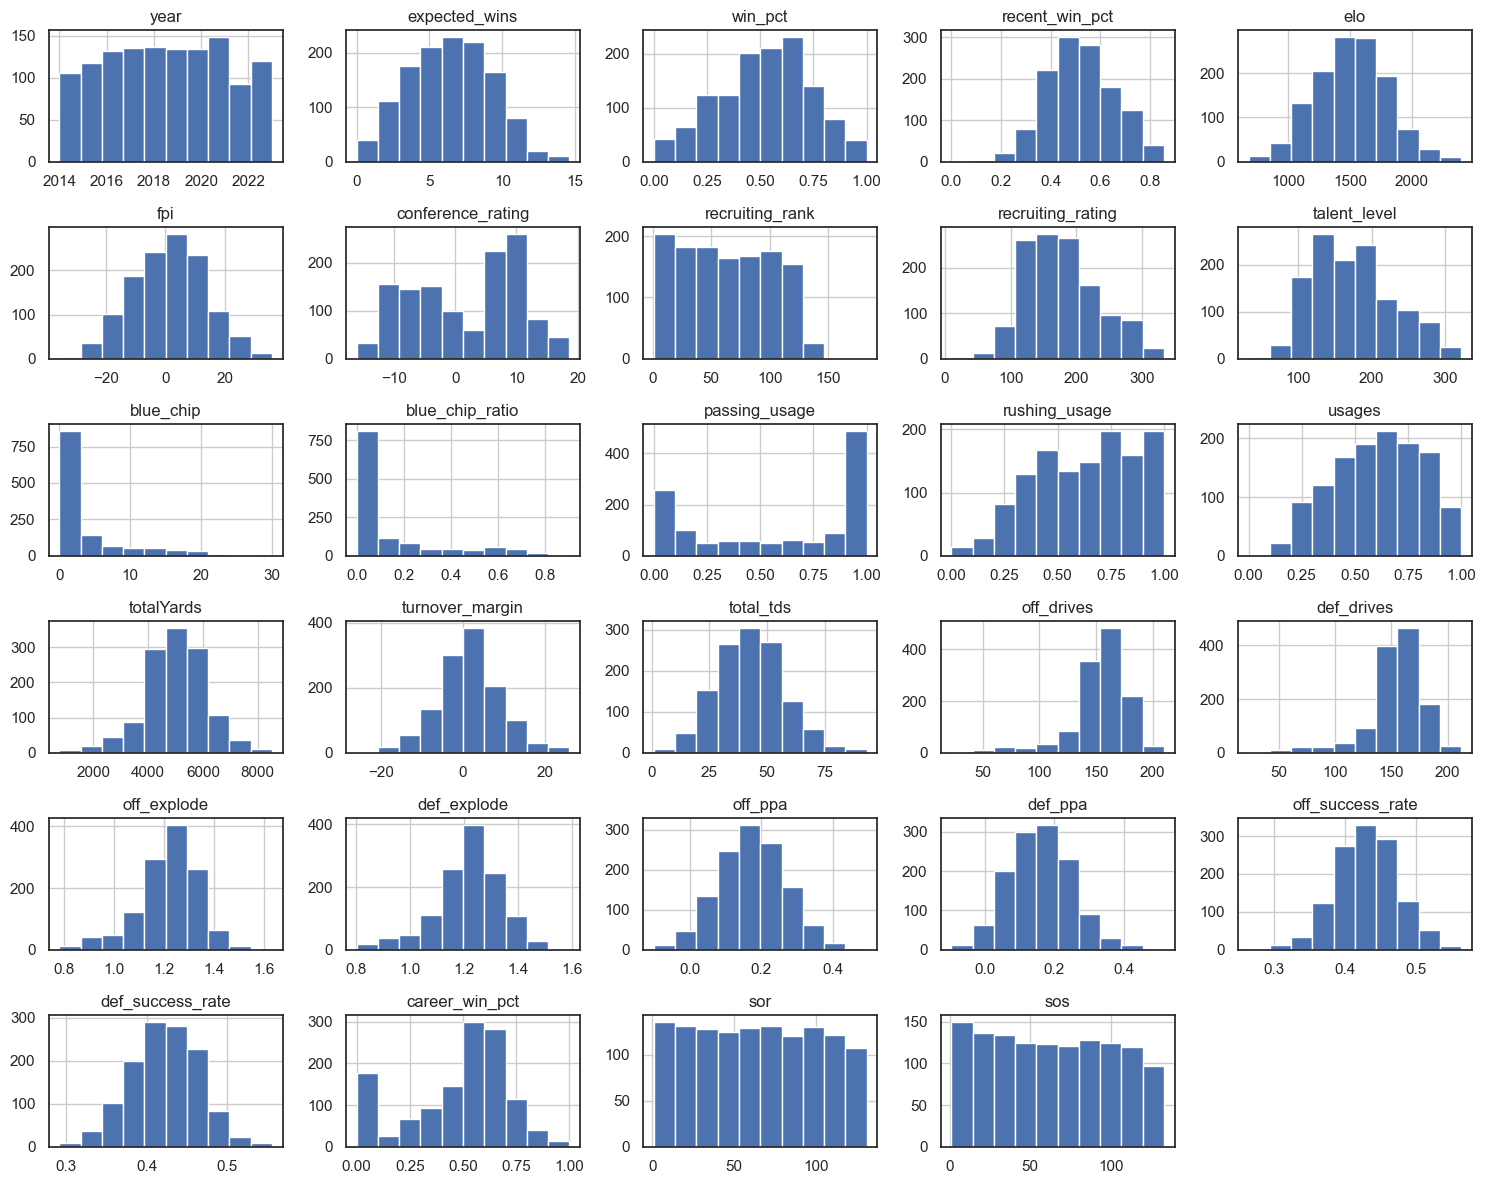

In [5]:
sns.set_theme(style='white')
df.hist(figsize=(15,12))
plt.tight_layout()
plt.savefig('images/numeric_features_histograms.png')
plt.show()

#### Correlations between Numeric Features

In [6]:
df.columns

Index(['team', 'year', 'conference', 'expected_wins', 'win_pct',
       'recent_win_pct', 'elo', 'fpi', 'conference_rating', 'recruiting_rank',
       'recruiting_rating', 'talent_level', 'blue_chip', 'blue_chip_ratio',
       'passing_usage', 'rushing_usage', 'usages', 'totalYards',
       'turnover_margin', 'total_tds', 'off_drives', 'def_drives',
       'off_explode', 'def_explode', 'off_ppa', 'def_ppa', 'off_success_rate',
       'def_success_rate', 'coach', 'career_win_pct', 'sor', 'sos'],
      dtype='object')

In [21]:
# Get numeric features
numeric = df.drop(columns={'team', 'year','conference', 'coach'})

# Remove obviously dependent features
numeric = numeric.drop(columns={'blue_chip', 'expected_wins', 'off_ppa', 'def_ppa'})

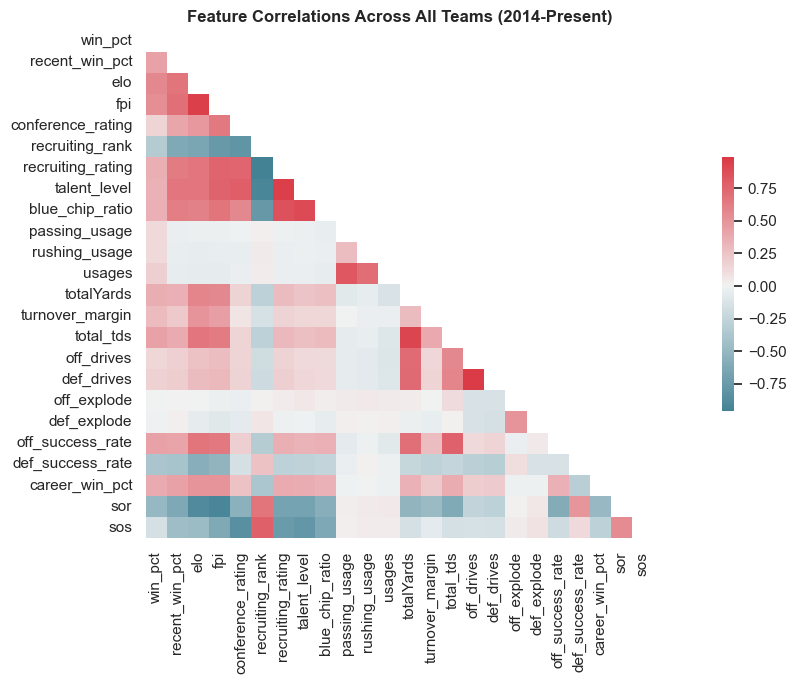

In [22]:
from seaborn import set_style
sns.set_theme(style='white')
# Calculate the correlations amongst features 
corr = numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

# Create nicer lower triangular seaborn correlation heatmap. Use diverging color palette to get -1,0,1
fig, ax = plt.subplots(figsize=(14,7))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, # Data
            mask=mask, # Mask certain cells
            cmap=cmap, # Colormap
            square=True, # Make squares
            #grid = False,
            #annot=True, # Show values
            #annot_kws={'size':6},
            #vmax=0.5, # Set scale for colors (all above will have same)
            #vmin=-0.5, # Min scale
            center=0, # Force center which is white for diverging palette
            #linewidths=0, # Width of line between squares
            cbar_kws={'shrink':0.5}) # Size of legend
plt.title('Feature Correlations Across All Teams (2014-Present)', fontweight='bold')
plt.tight_layout()
plt.savefig('images/correlation_heatmap.png', bbox_inches='tight')
plt.show()


In [23]:
# Save heatmap and table of values
corr.to_csv('out/correlation_table.csv')

big_win_corr = corr['win_pct'].sort_values(ascending=False)
biggest_corr_list = list(big_win_corr)
big_win_corr

win_pct              1.000000
elo                  0.565310
fpi                  0.523862
recent_win_pct       0.438748
off_success_rate     0.431740
total_tds            0.428409
career_win_pct       0.385150
totalYards           0.369861
recruiting_rating    0.355245
blue_chip_ratio      0.350005
talent_level         0.346032
turnover_margin      0.295428
usages               0.188803
def_drives           0.174564
conference_rating    0.163262
off_drives           0.153889
passing_usage        0.137565
rushing_usage        0.133231
off_explode         -0.009418
def_explode         -0.013493
sos                 -0.155365
recruiting_rank     -0.331449
def_success_rate    -0.387887
sor                 -0.496630
Name: win_pct, dtype: float64

#### Investigating Correlated Variables with Win Percentage
- Pick handful of most positive and most negatively correlated

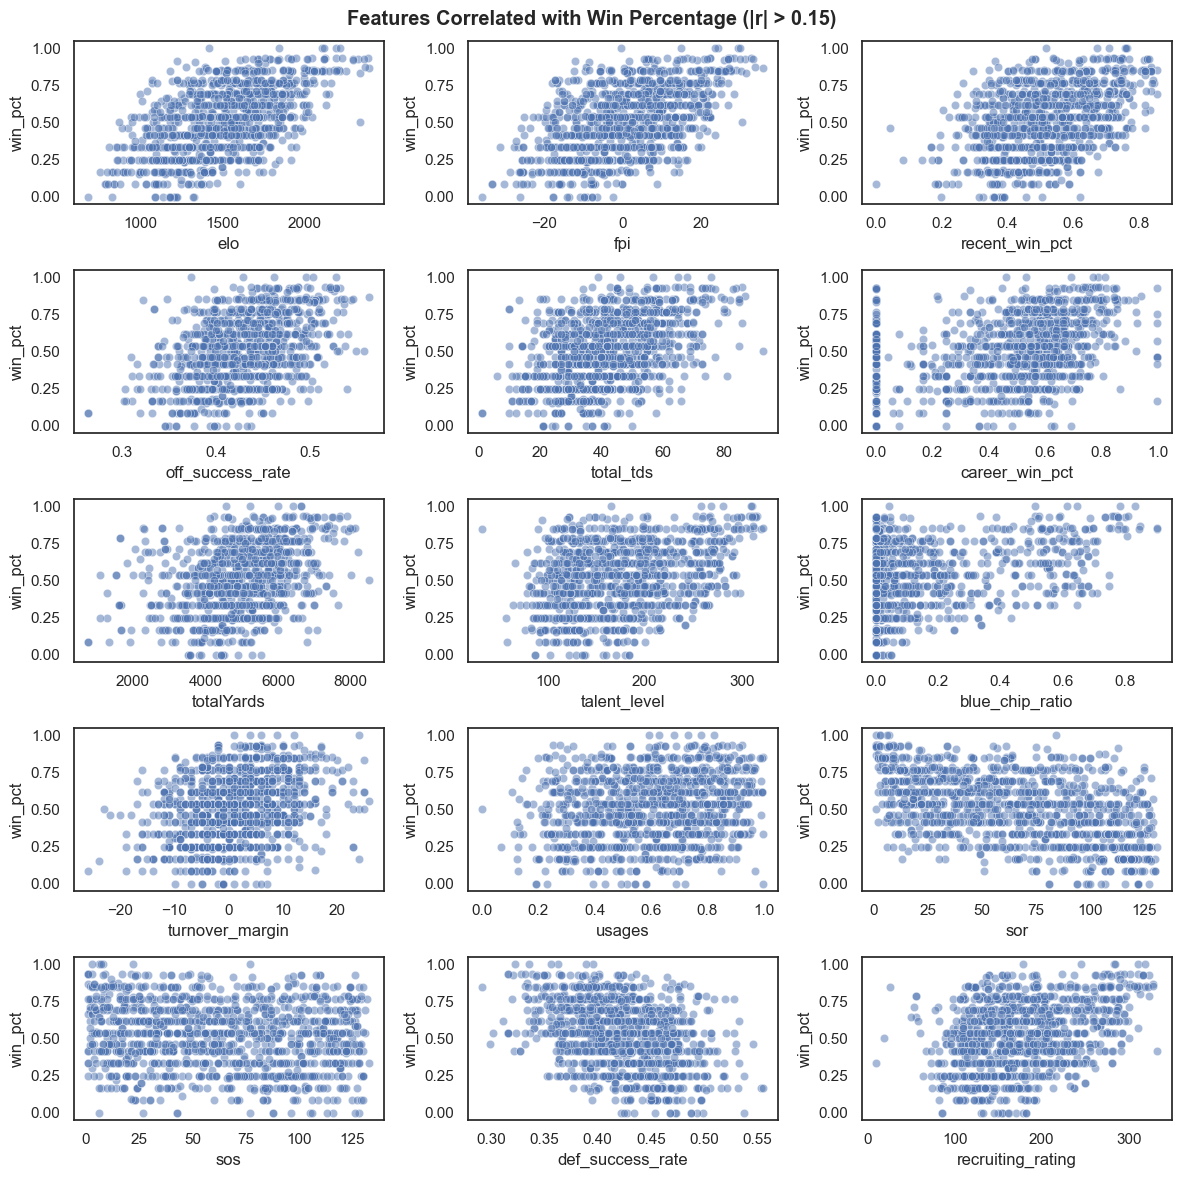

In [16]:
features = ['elo', 'fpi', 'recent_win_pct', 'off_success_rate', 'total_tds',
            'career_win_pct', 'totalYards', 'talent_level', 'blue_chip_ratio',
            'turnover_margin', 'usages', 'sor', 'sos', 'def_success_rate', 'recruiting_rating']
fig, axes = plt.subplots(len(features)//3,3, figsize=(12,12))
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.scatterplot(data=numeric, x=features[i], y='win_pct', ax=ax, alpha=0.5)

plt.suptitle('Features Correlated with Win Percentage (|r| > 0.15)', fontweight='bold')
plt.tight_layout()
plt.savefig('images/high-correlated-with-win-pct.png')
plt.show()

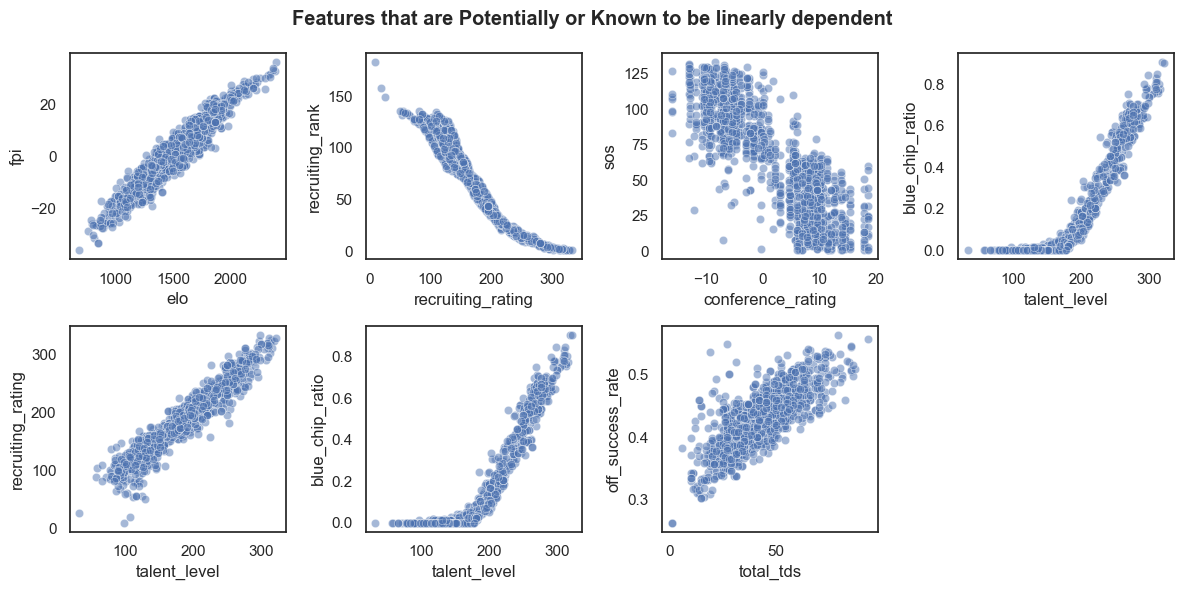

In [27]:
# Plot some features against each other that look highly correlated
#features = ['elo', 'fpi', 'off_success_rate', 'off_ppa']
fig, axes = plt.subplots(2,4, figsize=(12,6))
sns.scatterplot(data=numeric, x='elo', y='fpi', ax=axes[0][0], alpha=0.5)
sns.scatterplot(data=numeric, x='recruiting_rating', y='recruiting_rank', ax=axes[0][1], alpha=0.5)
sns.scatterplot(data=numeric, x='conference_rating', y='sos', ax=axes[0][2], alpha=0.5)
sns.scatterplot(data=numeric, x='talent_level', y='blue_chip_ratio', ax=axes[0][3], alpha=0.5)
sns.scatterplot(data=numeric, x='talent_level', y='recruiting_rating', ax=axes[1][0], alpha=0.5)
sns.scatterplot(data=numeric, x='talent_level', y='blue_chip_ratio', ax=axes[1][1], alpha=0.5)
sns.scatterplot(data=numeric, x='total_tds', y='off_success_rate', ax=axes[1][2], alpha=0.5)
axes[1][3].axis('off')
plt.suptitle('Features that are Potentially or Known to be linearly dependent', fontweight='bold')
plt.tight_layout()
plt.savefig('images/possibly-dependent-features.png')
plt.show()

ELO and FPI as well as Offensive success rate and offensive predicted points added, are clearly in someway linearly dependent or similiarly calculated. Off_ppa and success rate makes sense. FPI is proprietary.

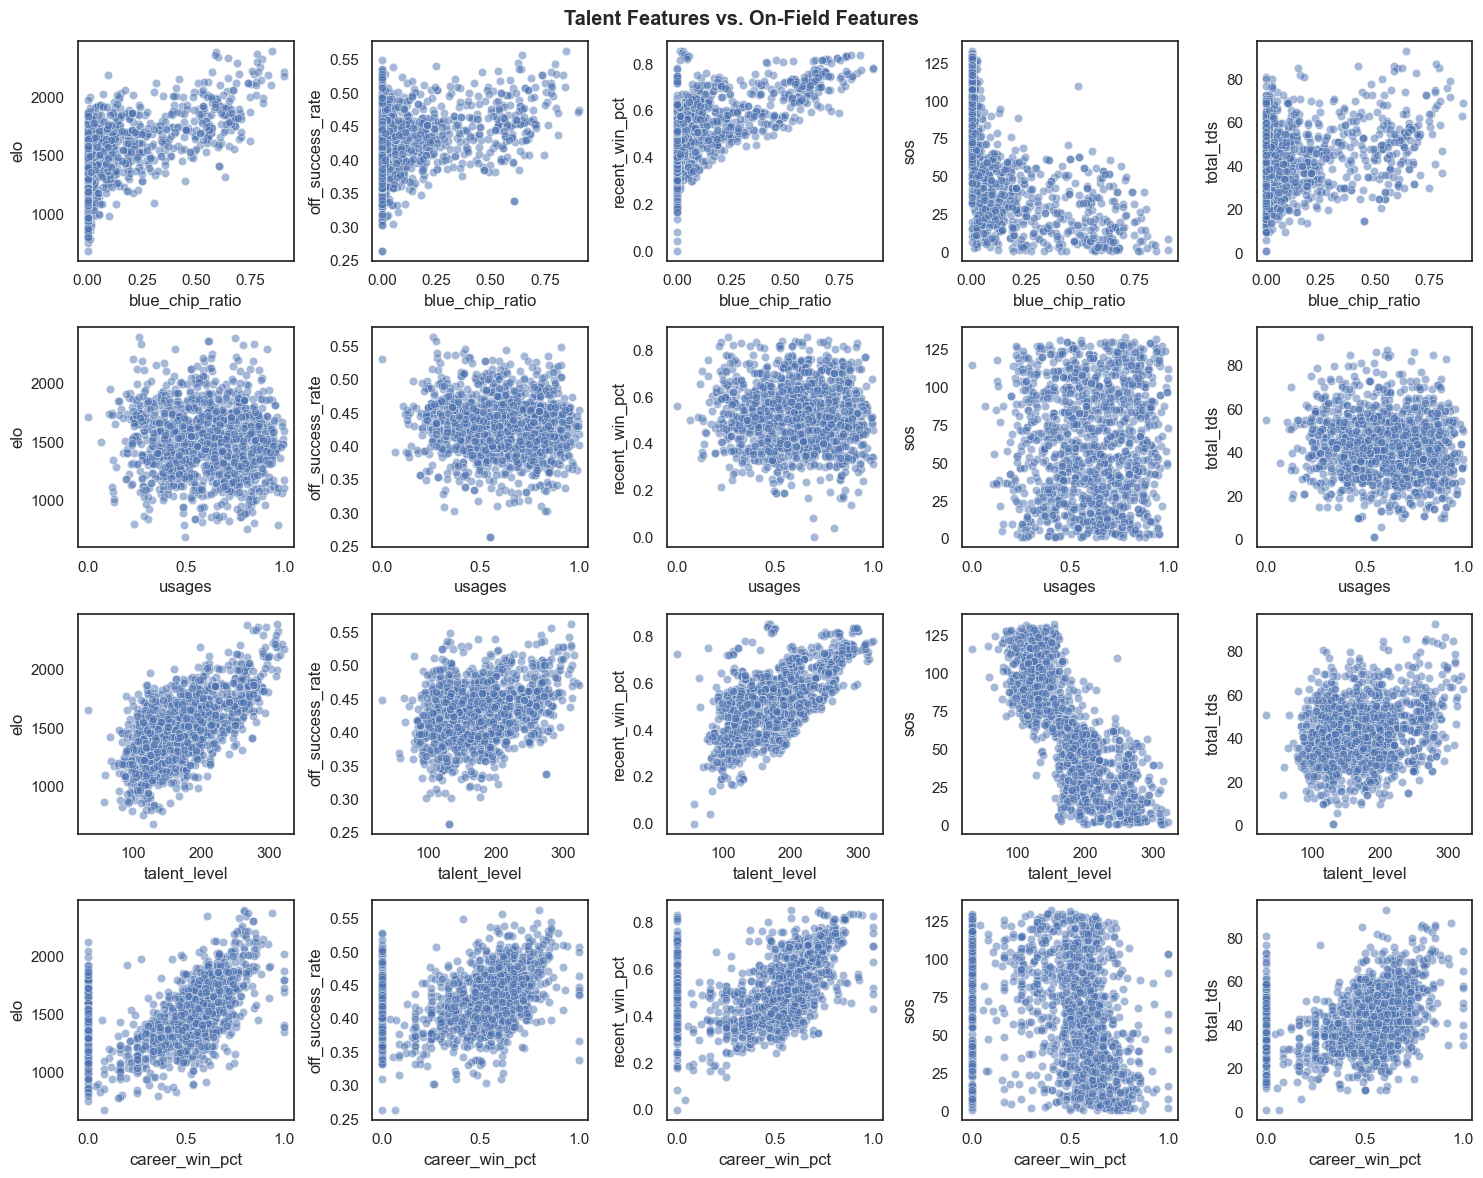

In [29]:
# Plot talent features against on field features
talent_features = ['blue_chip_ratio', 'usages', 'talent_level', 'career_win_pct']
on_field_features = ['elo', 'off_success_rate', 'recent_win_pct', 'sos', 'total_tds']
fig, axes = plt.subplots(len(talent_features),len(on_field_features), figsize=(15,12))

for i, talent_feature in enumerate(talent_features):
    for j, on_field_feature in enumerate(on_field_features):
        ax = axes[i,j]
        sns.scatterplot(data=numeric, x=talent_feature, y=on_field_feature, ax=ax, alpha=0.5)

plt.suptitle('Talent Features vs. On-Field Features', fontweight='bold')
plt.tight_layout()
plt.savefig('images/talent-vs-onfield-features.png')
plt.show()

### Exploring Tiers of Programs
- Note: Kennesaw State joined FBS in 2024
- Source: https://www.cllct.com/sports-collectibles/memorabilia/how-much-did-your-school-get-to-appear-in-ea-college-football-25
- Source: https://x.com/Brett_McMurphy/status/1794153471375278183?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Etweet

In [7]:
from scripts.pick_tier import pick_tier

test = pick_tier()
test

FileNotFoundError: [Errno 2] No such file or directory: '../data/working_df.csv'

In [ ]:
def choose_tier(tiers = 'all'):
    df = pd.read_csv('data/working_df.csv')
    if tiers == 'all':
        return df
    elif tiers == [1, 2]:
        return df[df['team'].isin(tier_one + tier_two)]    
    elif tiers == 1:
        return df[df['team'].isin(tier_one)]
    elif tiers == 2:
        return df[df['team'].isin(tier_two)] 
    elif tiers == 3:
        return df[df['team'].isin(tier_three)]
    elif tiers == [2,3]:
        return df[df['team'].isin(tier_two + tier_three)]            

### Categorical Features

In [88]:
categorical = ['team', 'conference', 'coach']
numerical = ['elo', 'win_pct', 'points', 'blue_chip_ratio']

#### Old: Cleaning Conference Data

Differences in conferences are appearing when teams switched conferences in a given year:
1. Louisville: American Athletic -> ACC in 2014
2. Maryland: ACC -> Maryland in 2014
3. New Mexico State  -> Independent in 2013, Sun Belt 2014-2017, Independent 2018-2022, Conference USA 2023 - Present
4. Rutgers -> Big East 1991-2012, AAC in 2013, Big Tem 2014-Present
5. Western Kentucky -> 99-2000 (Ohio Valley), 2001-2006 (Gateway Football Conference), 2007 (FCS Ind), 2008 (FBS Independent), 2009-2014 (Sun Belt), 2014-Present Conference USA
6. Navy 

In [89]:
# Note above that we didn't merge on conference, because some teams chan
#(df.conference_x == df.conference_y).value_counts()

In [90]:
#df[df.conference_x != df.conference_y][['team', 'year', 'conference_x', 'conference_y']]